In [1]:
from sympy import MatrixSymbol, BlockMatrix, ZeroMatrix, symbols, Identity, block_collapse
from sympy import DiagonalMatrix, init_printing, S, Matrix, eye
from sympy import cos, sin, tan, Dummy, I
from sympy import solve, sqrt, conjugate, fraction
from sympy.physics.quantum import Dagger
init_printing()

# One generation case

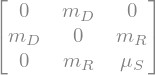

In [2]:
mD, mR, muS = symbols('m_D m_R mu_S', real=True)
Mnu = Matrix(
    [[0, mD, 0],
     [mD, 0, mR],
     [0, mR, muS]]
)
Mnu

## Approximate eigenvalues

In [3]:
lamb = symbols(r'\lambda', real=True)
char_eq = Mnu - lamb*eye(3)
char_eq = char_eq.det()
char_eq = char_eq.expand()
char_eq

In [4]:
m1, m2, m3 = symbols(r'm_1 m_2 m_3', positive=True)
# In the inverse seesaw we have muS << mD << mR, also, m1 << m2 ~ m3
char_eq_approx1 = char_eq.subs(lamb, m1)
# m1 << muS, then 
char_eq_approx1 = char_eq_approx1.replace(m1**3, 0).replace(m1**2, 0)
char_eq_approx1

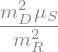

In [5]:
m1_approx = solve(char_eq_approx1, m1)[0]
m1_approx = m1_approx.simplify()
# but mD << mR, then
m1_approx = m1_approx.subs(mD**2 + mR**2, mR**2)
m1_approx

In [6]:
char_eq_approx2 = char_eq.collect(lamb, lambda x:x.factor())
char_eq_approx2

In [7]:
# m2 ~ m3 ~ mR, then the terms lam^3 + lamb*(mD**2 + mR**2) are dominant and we can ignore the term 
# proportional to muS
char_eq_approx2 = char_eq_approx2.replace(muS, 0)
char_eq_approx2 = char_eq_approx2.expand()
char_eq_approx2


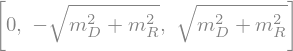

In [8]:
mheavy = solve(char_eq_approx2, lamb)
mheavy

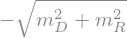

In [9]:
m2_eig = mheavy[1]
m3_eig = mheavy[2]
m2_eig

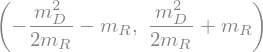

In [10]:
epsilon = symbols(r'\epsilon', positive=True)

m2_approx = m2_eig.subs(sqrt(mD**2 + mR**2), mR*sqrt(1 + epsilon**2)).series(epsilon, 0, 3).removeO().subs(epsilon, mD/mR).simplify()
m3_approx = m3_eig.subs(sqrt(mD**2 + mR**2), mR*sqrt(1 + epsilon**2)).series(epsilon, 0, 3).removeO().subs(epsilon, mD/mR).simplify()
m2_approx, m3_approx

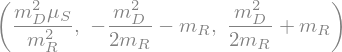

In [11]:
# the approximations are:
# m1 ~ (mD**2/mR**2)*muS
# m2 ~ -mR - (mD**2/2*mR)
# m3 ~  mR + (mD**2/2*mR)
m1_approx, m2_approx, m3_approx

## Approximate eigenvecs

In [12]:
# find eigenvectors
v1, v2, v3 = symbols(r'v_1 v_2 v_3')
eigen_eqs = Mnu - lamb*eye(3)
eigen_eqs = eigen_eqs * Matrix([v1, v2, v3])
eigen_eqs = [eq.expand() for eq in eigen_eqs]
eigen_eqs

### light neutrino $\lambda = m_1$

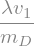

In [13]:
v2_sol = solve(eigen_eqs[0], v2)[0]
v2_sol

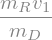

In [14]:
v3_sol = solve(eigen_eqs[2], v3)[0]
# lamb correspond to m1 light neutrino m1 << muS
v3_sol = v3_sol.subs(muS, 0).subs(v2, v2_sol).simplify()
v3_sol

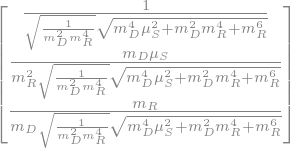

In [92]:
eigen1 = Matrix([v1, v2_sol, v3_sol]).subs(lamb, m1_approx).subs(v1,1)  # to avoid fractions
eigen1 = eigen1 / sqrt(eigen1.dot(Dagger(eigen1)))
eigen1 = eigen1.applyfunc(lambda x: x.simplify())
eigen1

### Heavy neutrino $\lambda = m_2, m_3$

In [93]:
eigen_eqs

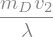

In [94]:
v1_sol2 = solve(eigen_eqs[0], v1)[0]
v1_sol2

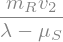

In [95]:
v3_sol2 = solve(eigen_eqs[2], v3)[0]
v3_sol2

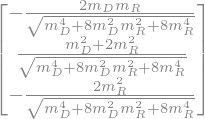

In [96]:
eigen2 = Matrix([v1_sol2, v2, v3_sol2]).subs(lamb, m2_approx).subs(muS,0).subs(v2, 1) # to avoid fractions
eigen2 = eigen2 / sqrt(eigen2.dot(Dagger(eigen2)).simplify())
eigen2 = eigen2.applyfunc(lambda x: x.simplify())
eigen2

In [97]:
eigen_eqs

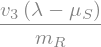

In [98]:
v2_sol3 = solve(eigen_eqs[2], v2)[0]
v2_sol3

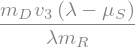

In [99]:
v1_sol3 = solve(eigen_eqs[0].subs(v2, v2_sol3), v1)[0]
v1_sol3


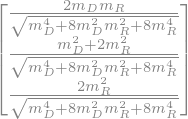

In [100]:
eigen3 = Matrix([v1_sol3, v2_sol3, v3]).subs(lamb, m3_approx).subs(muS,0).subs(v3, 1) # to avoid fractions
eigen3 = eigen3 / sqrt(eigen3.dot(Dagger(eigen3)).simplify())
eigen3 = eigen3.applyfunc(lambda x: x.simplify())
eigen3

### Eigenvector matrix U 

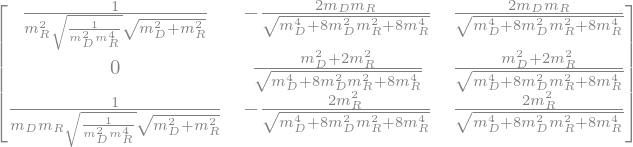

In [101]:
U = Matrix.hstack(eigen1, eigen2, eigen3)
U_approx = U.subs(muS, 0).applyfunc(lambda x:x.factor())#.applyfunc(lambda x: x.series(muS, 0, 2).removeO().factor())
U_approx

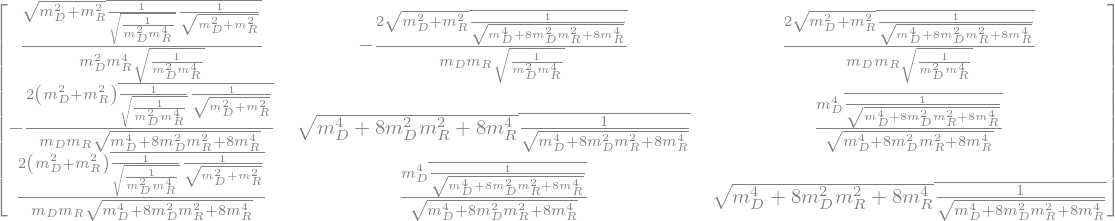

In [102]:
# unitary check
UU = U.T* conjugate(U)
UU_approx = U_approx.T* conjugate(U_approx)
UU_approx = UU_approx.applyfunc(lambda x:x.factor())
UU_approx

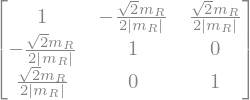

In [105]:
sqrt_mD_mR = sqrt(mD**2 + mR**2)
sqrt_mD_mR4 = sqrt(mD**4 + 8*mR**4 + 8*mD**2*mR**2)
conjugate_assumptions = {
    conjugate(1/sqrt_mD_mR): 1/sqrt_mD_mR,
    conjugate(1/sqrt_mD_mR4): 1/sqrt_mD_mR4,
    conjugate(1/sqrt(1/(mD**2*mR**4))): 1/sqrt(1/(mD**2*mR**4))
}
UU_approx.subs(conjugate_assumptions).subs(muS, 0).subs(
    mD**4 + 8*mD**2*mR**2 + 8*mR**4, (8*mR**4 + 8*mD**2*mR**2).factor()
).applyfunc(lambda x:x.series(mD, 0, 3).removeO().factor())

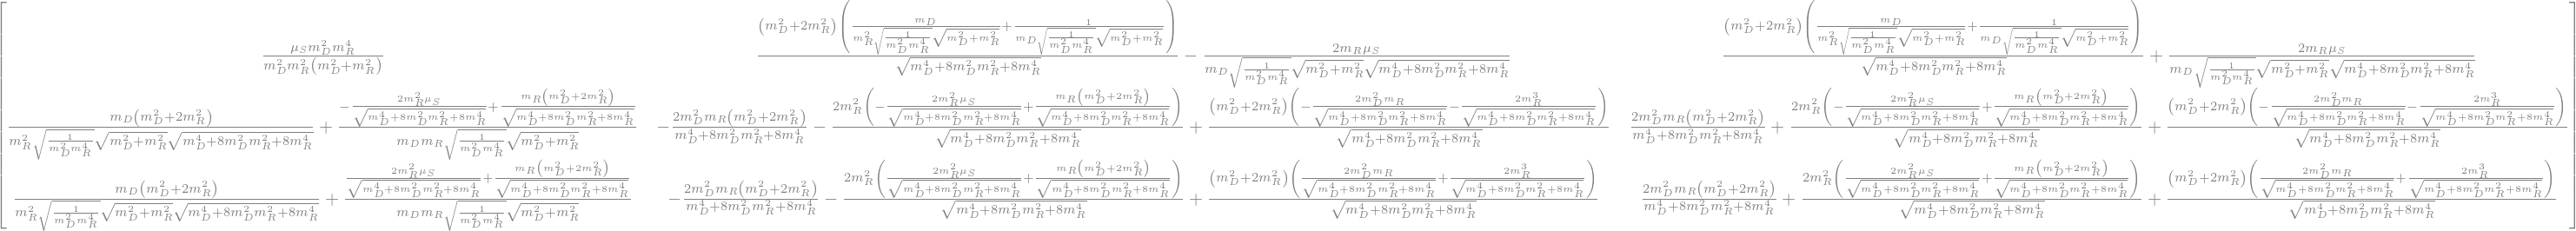

In [106]:
UMnuU = U.T* Mnu * U
UMnuU_approx = U_approx.T* Mnu * U_approx
UMnuU_approx

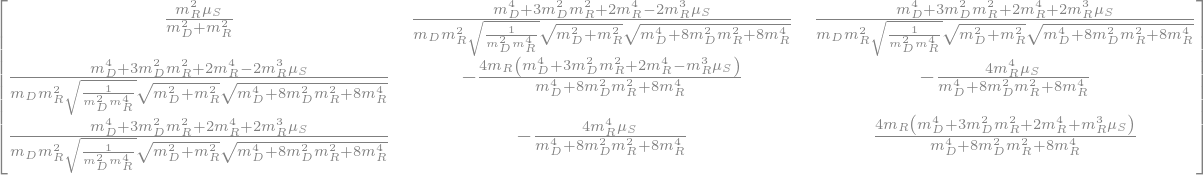

In [107]:
UMnuU_approx2 = UMnuU_approx.applyfunc(lambda x: x.series(muS, 0, 2).removeO().factor())
UMnuU_approx2

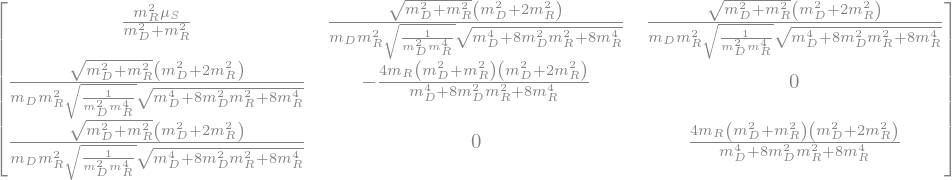

In [109]:
# replace muS = 0 in all entries exceprt in the (1,1) entry
for i in range(3):
    for j in range(3):
        if (i, j) != (0, 0):
            UMnuU_approx2[i, j] = UMnuU_approx2[i, j].subs(muS, 0).factor()
UMnuU_approx2

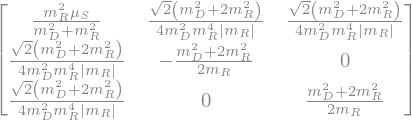

In [111]:
UMnuU_approx2.subs(mD**4 + 8*mD**2*mR**2 + 8*mR**4, (8*mR**4 + 8*mD**2*mR**2).factor()).subs(
    sqrt(1/(mD**2*mR**4)), 1/(1/(mD*mR**2))
)

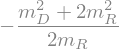

In [113]:
m2_approx.factor()

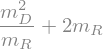

In [118]:
m3_approx - m2_approx